## Download timeseries files for individual buildings

This tutorial will walk through how to find and download timeseries results for a building type in one state from the ResStock 2025 Release 1 dataset. This tutorial is inspired by and takes sections from the [ComStock tutorial](https://natlabrockies.github.io/ComStock.github.io/docs/resources/how_to_guides/example_scripts.html) for accessing datasets programmatically.

Before starting this tutorial, look at the [Data page]({{ site.baseurl }}{% link docs/data.md %}) which has important notes about how each ResStock dataset is formatted and organized. To complete this tutorial, you will need to install the following Python libraries: pandas and matplotlib.

### Import Libraries

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

## Choose the ResStock dataset

This tutorial pulls from the [ResStock 2025 Release 1 AMY2018 dataset](https://data.openei.org/s3_viewer?bucket=oedi-data-lake&prefix=nrel-pds-building-stock%2Fend-use-load-profiles-for-us-building-stock%2F2025%2Fresstock_amy2018_release_1%2F&limit=50) and compares timeseries baseline data to timeseries data for upgrade 12, attic insulation for unfinished attics. We will compare results for the state of Arizona in single-family detached buildings. To see a full list of upgrade options available and a short description of each, refer to this dataset's [README](https://oedi-data-lake.s3.amazonaws.com/nrel-pds-building-stock/end-use-load-profiles-for-us-building-stock/2025/resstock_amy2018_release_1/README_resstock_20251.pdf). We will look at the yearly timeseries profile, and then also zoom in on one week during the summer.

In this example, we are filtering by a building type. ResStock releases timeseries aggregates by building type, so we can directly use those files. The timeseries aggregates already have the weighting factor applied as well, so we do not need to consider the weighting factor in the results.

Navigate to the correct files for this ResStock release on [OEDI](https://data.openei.org/s3_viewer?bucket=oedi-data-lake&prefix=nrel-pds-building-stock%2Fend-use-load-profiles-for-us-building-stock%2F2025%2Fresstock_amy2018_release_1%2F), and store the links in the two URI placeholders below. The files for this example can be found under 'timeseries_aggregates/ > by_state/ > upgrade=XX/ > state=AR/ > upXX-ar-single-family_detached.csv', where XX represents the upgrade number. 0 is the baseline and 12 is the attic insulation.

In [ ]:
# Baseline timeseries URI
baseline_timeseries_uri = 'https://oedi-data-lake.s3.amazonaws.com/nrel-pds-building-stock/end-use-load-profiles-for-us-building-stock/2025/resstock_amy2018_release_1/timeseries_aggregates/by_state/upgrade=0/state=AR/up00-ar-single-family_detached.csv'

# Upgrade timeseries URI
upgrade_timeseries_uri = 'https://oedi-data-lake.s3.amazonaws.com/nrel-pds-building-stock/end-use-load-profiles-for-us-building-stock/2025/resstock_amy2018_release_1/timeseries_aggregates/by_state/upgrade=12/state=AR/up12-ar-single-family_detached.csv'

# Store the uri links
baseline = pd.read_csv(
    baseline_timeseries_uri,
    low_memory=False  # Use more memory for better type inference
)

upgrade = pd.read_csv(
    upgrade_timeseries_uri,
    low_memory=False # Use more memory for better type inference
)

# If the results file was a parquet file instead of a csv file, uncomment out the next line and use a similar formatting instead to store the URI link.
#baseline_timeseries = pd.read_parquet(baseline_timeseries_uri)

In [ ]:
# Look at the baseline data
baseline.head()

   upgrade in.state in.geometry_building_type_recs            timestamp  \
0        0       AR         Single-Family Detached  2018-01-01 00:15:00   
1        0       AR         Single-Family Detached  2018-01-01 00:30:00   
2        0       AR         Single-Family Detached  2018-01-01 00:45:00   
3        0       AR         Single-Family Detached  2018-01-01 01:00:00   
4        0       AR         Single-Family Detached  2018-01-01 01:15:00   

   models_used  units_represented  \
0         3831      972704.970218   
1         3831      972704.970218   
2         3831      972704.970218   
3         3831      972704.970218   
4         3831      972704.970218   

   out.electricity.ceiling_fan.energy_consumption..kwh  \
0                                          1065.5905     
1                                          1122.8915     
2                                          1173.5275     
3                                          1145.3544     
4                                   

In [ ]:
# Look at the upgrade data
upgrade.head()

   upgrade in.state in.geometry_building_type_recs            timestamp  \
0       12       AR         Single-Family Detached  2018-01-01 00:15:00   
1       12       AR         Single-Family Detached  2018-01-01 00:30:00   
2       12       AR         Single-Family Detached  2018-01-01 00:45:00   
3       12       AR         Single-Family Detached  2018-01-01 01:00:00   
4       12       AR         Single-Family Detached  2018-01-01 01:15:00   

   models_used  units_represented  \
0         3831      972704.970218   
1         3831      972704.970218   
2         3831      972704.970218   
3         3831      972704.970218   
4         3831      972704.970218   

   out.electricity.ceiling_fan.energy_consumption..kwh  \
0                                          1065.5905     
1                                          1122.8915     
2                                          1173.5275     
3                                          1145.3544     
4                                   

### Plot total site energy consumption between baseline and upgrade. Then, save the data.

In this example, we are plotting all single-family detached dwelling units for the baseline and upgrade 12, even if they did not get upgrade 12 applied. The site energy column to analyze is 'out.site_energy.total.energy_consumption..kwh'. Results columns in timeseries aggregate files already have the weighting factor applied, so nothing additional is needed for this column. The [data dictionary](https://oedi-data-lake.s3.amazonaws.com/nrel-pds-building-stock/end-use-load-profiles-for-us-building-stock/2025/resstock_amy2018_release_1/data_dictionary.tsv) for this ResStock release has information on all column names for output files.

In [ ]:
field = 'out.site_energy.total.energy_consumption..kwh'

# Create one dataframe with a timestamp and site energy consumption from both measures
data = pd.concat([baseline['timestamp'],baseline[field].rename('Baseline Site Energy'), upgrade[field].rename('Attic Insulation Site Energy')], axis=1)
data = data.set_index('timestamp')
print(data.head())

# Save the dataframe
data.to_csv('Arizona_single_family_detached_timeseries_ResStock_2025_1.csv', index='time')

                     Baseline Site Energy  Attic Insulation Site Energy
timestamp                                                              
2018-01-01 00:15:00             889738.75                     816149.25
2018-01-01 00:30:00             909852.20                     830321.50
2018-01-01 00:45:00             917787.75                     836324.90
2018-01-01 01:00:00             931788.25                     850471.00
2018-01-01 01:15:00            2687903.20                    2514012.20


### Plot the baseline and attic insulation site energy consumption load profile

In timeseries aggregate files, like the ones used in this example, the timeseries data is all in Eastern Standard Time. See the [ResStock FAQs]({{ site.baseurl }}{% link docs/FAQ.html %}) for more details on time zones of the results.

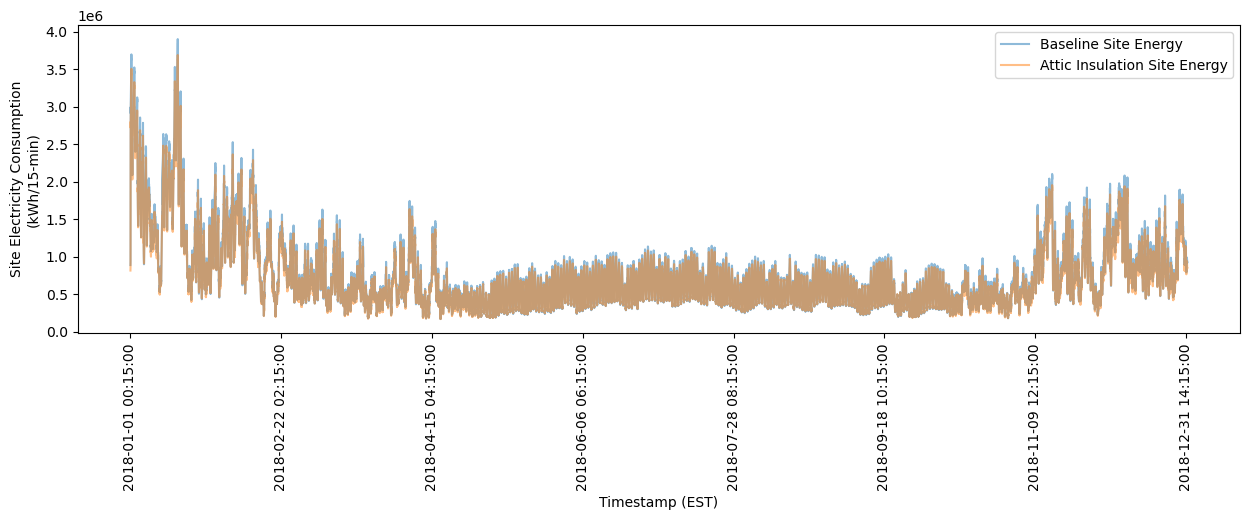

In [8]:
data.plot(figsize=(15,4), xlabel='Timestamp (EST)', ylabel='Site Electricity Consumption\n(kWh/15-min)', alpha=0.5)
plt.xticks(rotation=90)
plt.show()

### Zoom in to one specific week of data

Pick one week of data to show in a zoomed in graph. In timeseries files, the time shown represents the total load for the 15 minutes before the timestamp date.

In [1]:
start_date = '2018-07-08 00:15:00' # Pick a start for the week, this captures data from midnight to 12:15am on July 8th, 2018
end_date = '2018-07-16 00:00:00' # Pick an end date for the week, this captures data from 11:45pm to midnight of July 15th, 2018

# Filter the data
data_week = data.loc[start_date:end_date]
print(data_week.head())

# Plot the data
data_week.plot(figsize=(15,4), xlabel='Timestamp (EST)', ylabel='Site Electricity Consumption\n(kWh/15-min)', alpha=0.5)
plt.xticks(rotation=90)
plt.show()

NameError: name 'data' is not defined